# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

## Download the Data

In [2]:
import os
import tarfile
import urllib.request

# HOUSES_PATH = os.path.join("datasets", "houses")

In [3]:
import pandas as pd

def load_houses_data(): # (neo_path=HOUSES_PATH):
    csv_path = os.path.join("kc_house_data.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

In [4]:
houses = load_houses_data()
# houses.replace([np.inf, -np.inf], np.nan, inplace=True)
# # Drop rows with NaN
# # houses.dropna(inplace=True)
# houses.dropna(inplace=True)
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
houses["floors"].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

In [7]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


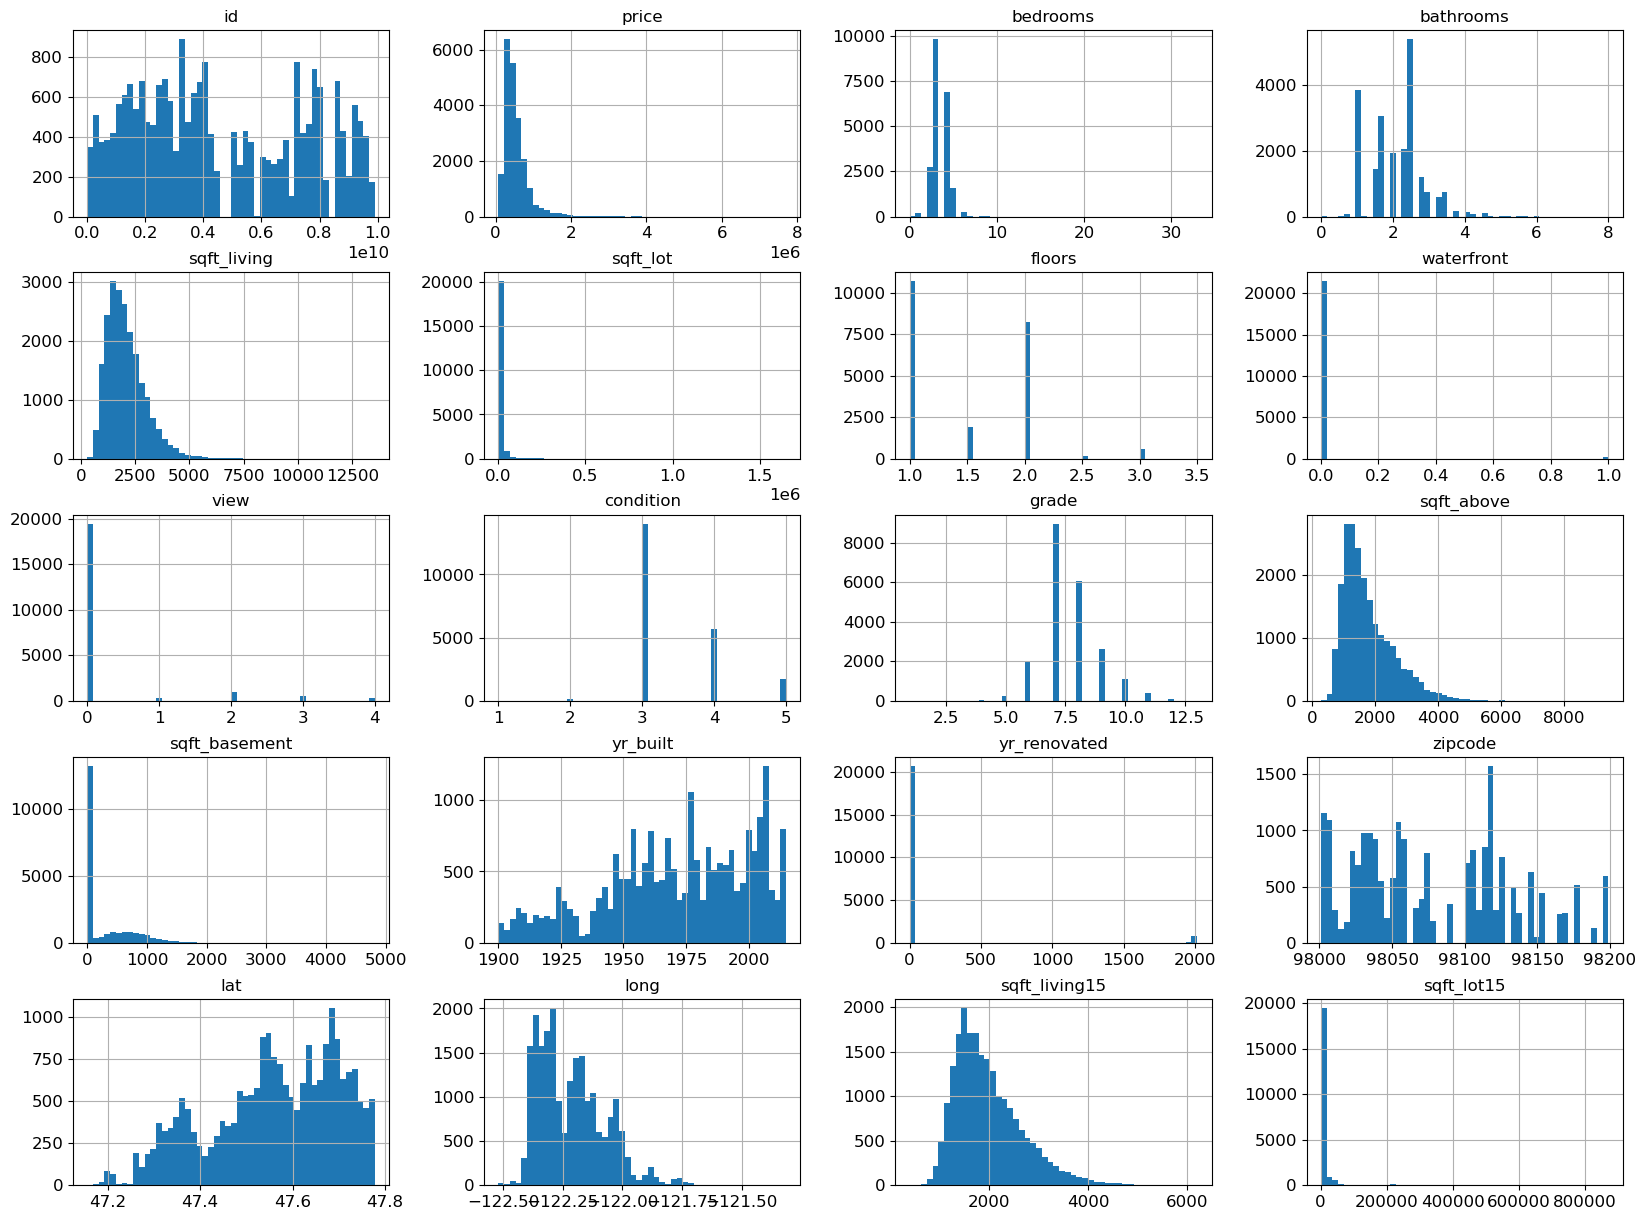

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
houses.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

## Create a Test Set

In [9]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [10]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(houses, 0.2)
len(train_set)

17291

In [12]:
len(test_set)

4322

In [13]:
houses = houses.drop("id", axis=1)
houses = houses.drop("date", axis=1)
houses = houses.drop("zipcode", axis=1)

In [14]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(houses, test_size=0.2, random_state=42)

In [16]:
test_set.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
735,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700
2830,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283
4106,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685
16218,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226
19964,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050


<Axes: >

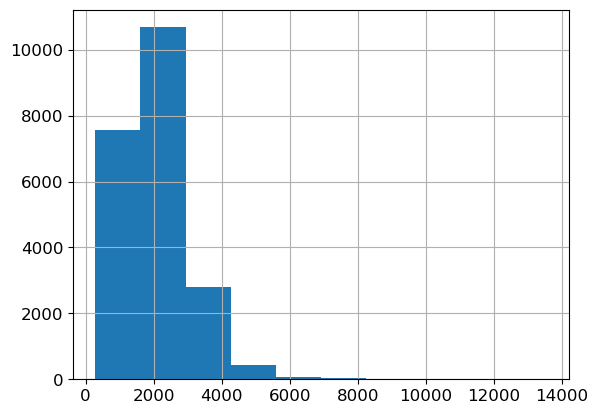

In [17]:
houses["sqft_living"].hist()

In [18]:
houses["sqft_living_cat"] = pd.cut(houses["sqft_living"],
                               bins=[500, 1000, 1500, 2000, 4000, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [19]:
houses["sqft_living_cat"].value_counts()

sqft_living_cat
4    9118
3    5382
2    4836
1    1476
5     783
Name: count, dtype: int64

<Axes: >

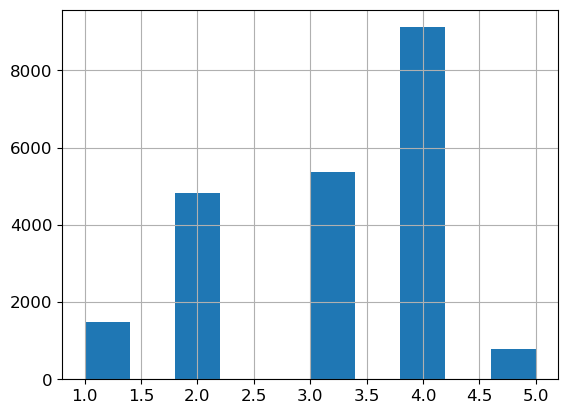

In [20]:
houses["sqft_living_cat"].hist()

In [21]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_living_cat
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,4
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,3
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,3


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

# houses[houses.isna().any(axis=1)]
houses.replace([np.inf, -np.inf], np.nan, inplace=True)
houses.dropna(axis=0, how="any", inplace=True)
# houses[houses.isna().any(axis=1)]
houses = houses.reset_index()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(houses, houses["sqft_living_cat"]):
# #     print(train_index, test_index)
# #     print(19452 in train_index)
# #     print(19452 in test_index)
    strat_train_set = houses.loc[train_index]
    strat_test_set = houses.loc[test_index]

In [23]:
strat_test_set["sqft_living_cat"].value_counts() / len(strat_test_set)

sqft_living_cat
4    0.422320
3    0.249132
2    0.223894
1    0.068303
5    0.036351
Name: count, dtype: float64

In [24]:
houses["sqft_living_cat"].value_counts() / len(houses)

sqft_living_cat
4    0.422227
3    0.249224
2    0.223941
1    0.068349
5    0.036258
Name: count, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

def sqft_living_cat_proportions(data):
    return data["sqft_living_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(houses, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": sqft_living_cat_proportions(houses),
    "Stratified": sqft_living_cat_proportions(strat_test_set),
    "Random": sqft_living_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [26]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
sqft_living_cat,,,,,
1,0.068349,0.068303,0.068997,0.948509,-0.067751
2,0.223941,0.223894,0.218801,-2.295285,-0.020678
3,0.249224,0.249132,0.252836,1.449275,-0.037161
4,0.422227,0.422320,0.421857,-0.087739,0.021935
5,0.036258,0.036351,0.037509,3.448276,0.255428


In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("sqft_living_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [28]:
houses = strat_train_set.copy()

<Axes: xlabel='long', ylabel='lat'>

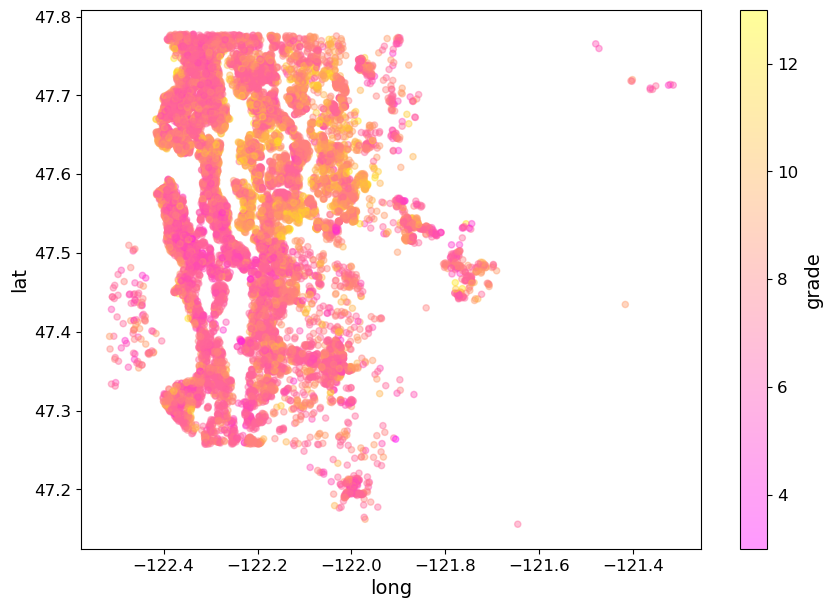

In [29]:
houses.plot(kind="scatter", x="long", y="lat", alpha=0.4, 
            figsize=(10,7),
            c="grade", cmap=plt.get_cmap("spring"), colorbar=True,
            sharex=False)

<Axes: xlabel='long', ylabel='lat'>

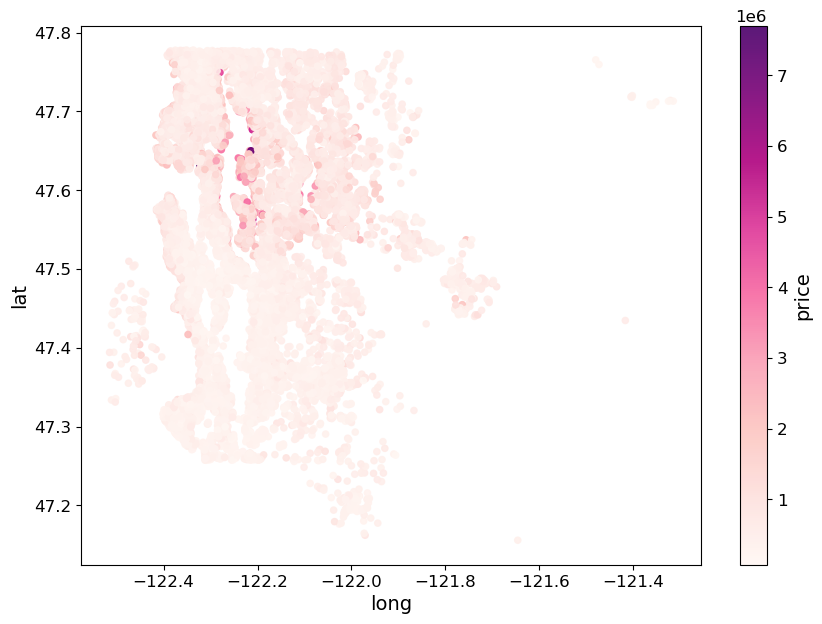

In [30]:
houses.plot(kind="scatter", x="long", y="lat", alpha=0.9, 
            figsize=(10,7),
            c="price", cmap=plt.get_cmap("RdPu"), colorbar=True,
             sharex=False)

## Looking for Correlations

In [31]:
corr_matrix = houses.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.700257
grade            0.669610
sqft_above       0.601690
sqft_living15    0.581013
bathrooms        0.526555
view             0.389192
sqft_basement    0.328858
bedrooms         0.307437
lat              0.307174
waterfront       0.267123
floors           0.261013
yr_renovated     0.130755
sqft_lot         0.090125
sqft_lot15       0.082258
yr_built         0.051811
condition        0.037143
index            0.028936
long             0.018001
Name: price, dtype: float64

Saving figure scatter_matrix_plot


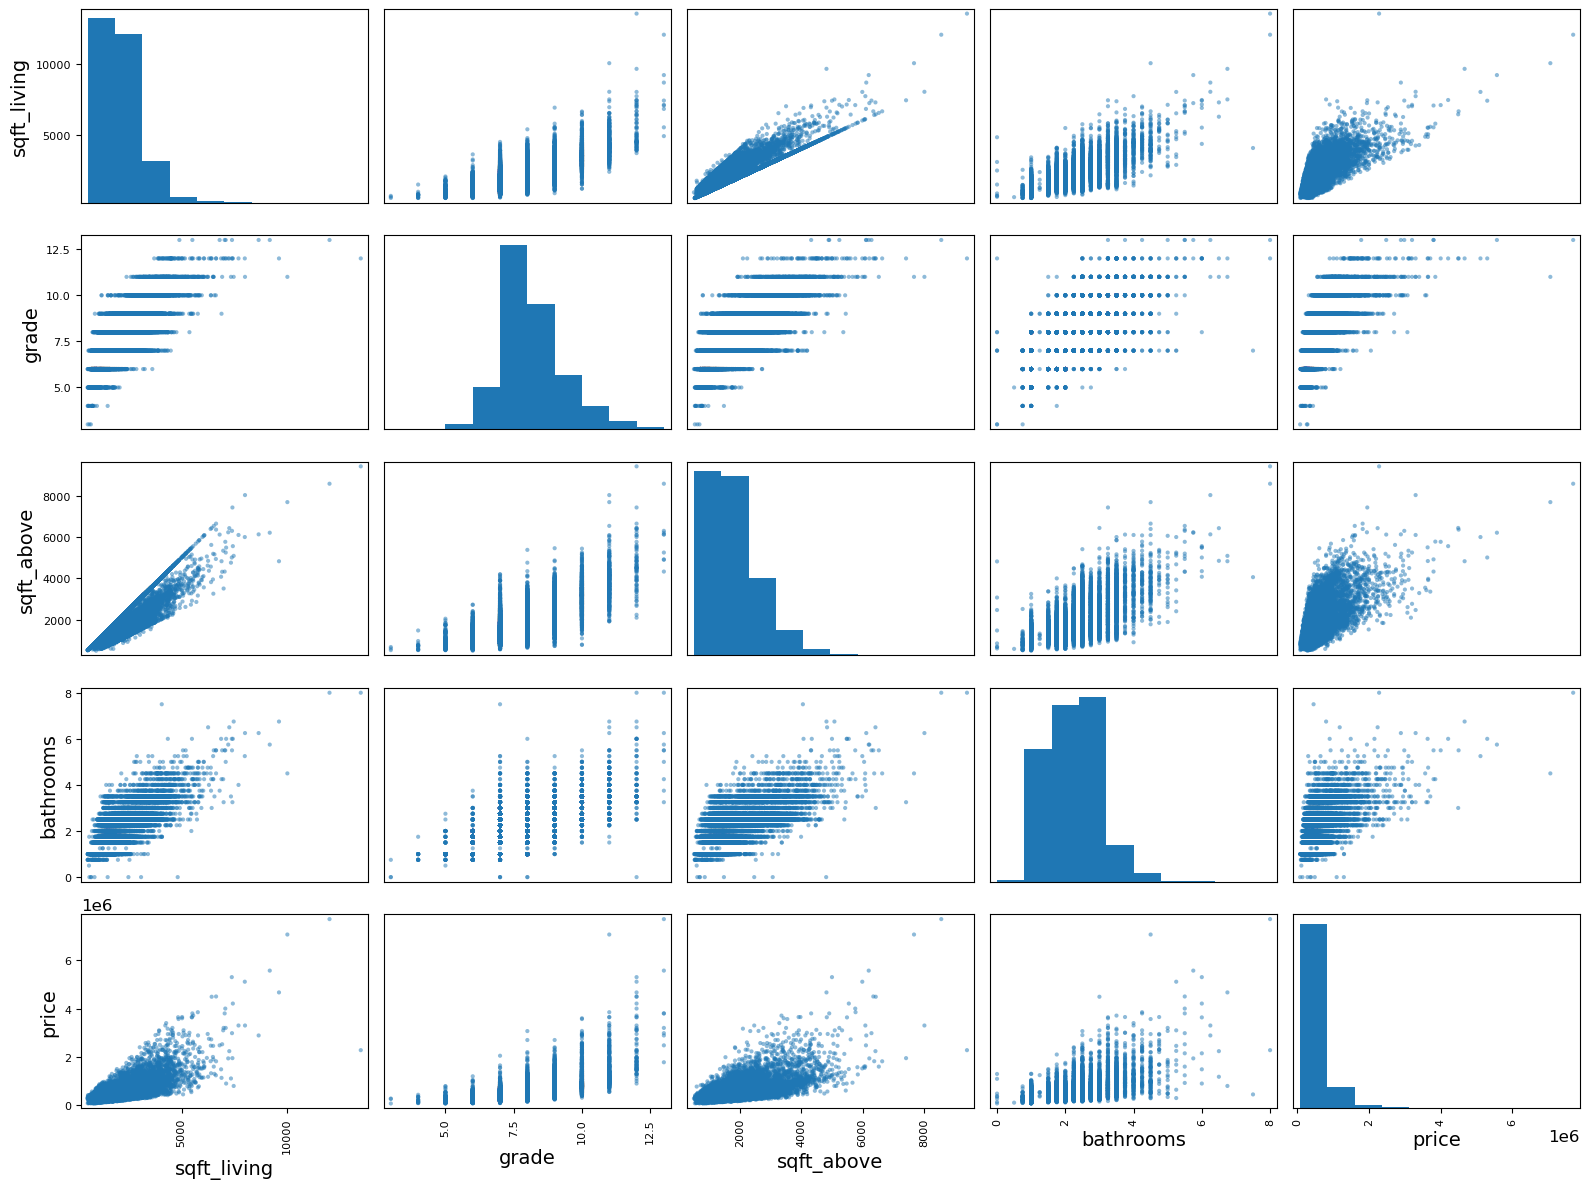

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["sqft_living", "grade",
              "sqft_above", "bathrooms", "price"]
scatter_matrix(houses[attributes], figsize=(16, 12))
save_fig("scatter_matrix_plot")

# Prepare the Data for Machine Learning Algorithms

In [33]:
strat_train_set.drop("index", axis=1, inplace=True)
strat_test_set.drop("index", axis=1, inplace=True)
houses = strat_train_set.drop("price", axis=1)
houses_labels = strat_train_set["price"].copy()

In [34]:
houses.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
20332,4,2.75,3510,9400,2.0,0,0,3,9,3510,0,2014,0,47.4827,-122.131,3550,9429
10387,4,2.75,2520,14021,2.0,0,0,3,9,2520,0,1999,0,47.7344,-121.957,2330,14007
682,4,3.50,2380,5809,2.0,0,0,4,7,1750,630,1995,0,47.5536,-122.359,1620,5775
5321,4,2.00,1690,8208,1.0,0,0,4,7,1210,480,1958,0,47.6052,-122.126,1620,8496
5512,5,2.25,3410,35536,2.0,0,0,3,10,2530,880,1974,0,47.6500,-122.155,3140,43453


## Transformation Pipelines

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

houses_prepared = full_pipeline.fit_transform(houses)

In [36]:
houses_prepared

array([[ 0.67981669,  0.82128618,  1.55985777, ...,  0.59329776,
         2.28852982, -0.12003245],
       [ 0.67981669,  0.82128618,  0.47876227, ...,  1.83126223,
         0.50387   ,  0.04497627],
       [ 0.67981669,  1.79441484,  0.32588008, ..., -1.02886257,
        -0.5347435 , -0.25173666],
       ...,
       [-0.39805713, -0.15184247, -0.79889605, ...,  1.43995162,
        -0.92970919, -0.15038137],
       [-0.39805713, -1.44934734, -0.85349684, ..., -1.02886257,
        -1.13450622,  0.16511041],
       [-0.39805713,  1.47003862,  1.80010122, ...,  1.10555892,
         2.55184029,  0.07835288]])

In [37]:
houses_prepared.shape

(17276, 17)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(houses_prepared, houses_labels)

LinearRegression()

In [39]:
some_data = houses.iloc[:5]
some_labels = houses_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [793011.87291687 749184.33803311 506465.72733347 415663.13753515
 977495.65435918]


In [40]:
print("Labels:", list(some_labels))

Labels: [659950.0, 518000.0, 413000.0, 478000.0, 815000.0]


In [41]:
some_data_prepared

array([[ 0.67981669,  0.82128618,  1.55985777, -0.13746233,  0.93137818,
        -0.08808103, -0.30650103, -0.63126658,  1.14192533,  2.09444695,
        -0.65904668,  1.45982071, -0.20823056, -0.55821788,  0.59329776,
         2.28852982, -0.12003245],
       [ 0.67981669,  0.82128618,  0.47876227, -0.0243759 ,  0.93137818,
        -0.08808103, -0.30650103, -0.63126658,  1.14192533,  0.89037991,
        -0.65904668,  0.94989793, -0.20823056,  1.26005218,  1.83126223,
         0.50387   ,  0.04497627],
       [ 0.67981669,  1.79441484,  0.32588008, -0.22534231,  0.93137818,
        -0.08808103, -0.30650103,  0.90044149, -0.56500973, -0.04611668,
         0.75482382,  0.81391853, -0.20823056, -0.04603931, -1.02886257,
        -0.5347435 , -0.25173666],
       [ 0.67981669, -0.15184247, -0.42761073, -0.1666333 , -0.91725342,
        -0.08808103, -0.30650103,  0.90044149, -0.56500973, -0.70288052,
         0.41818799, -0.44389098, -0.20823056,  0.32671689,  0.62887146,
        -0.5347435 

In [42]:
from sklearn.metrics import mean_squared_error

houses_predictions = lin_reg.predict(houses_prepared)
lin_mse = mean_squared_error(houses_labels, houses_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

201692.85388969354

In [43]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(houses_labels, houses_predictions)
lin_mae

126402.11298059362

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(houses_prepared, houses_labels)

DecisionTreeRegressor(random_state=42)

In [45]:
houses_predictions = tree_reg.predict(houses_prepared)
tree_mse = mean_squared_error(houses_labels, houses_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

9660.555753333902

## Better Evaluation Using Cross-Validation

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, houses_prepared, houses_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [47]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [159257.16495275 207454.0150893  225254.23290091 214536.8149157
 181745.13075812 178647.64140704 183219.08909736 181305.36218815
 180509.30150112 246388.11918039]
Mean: 195831.68719908525
Standard deviation: 25185.084377683837


In [48]:
lin_scores = cross_val_score(lin_reg, houses_prepared, houses_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [188584.79929498 194170.72090618 202098.77400158 219449.17686725
 189250.6457347  198476.26261549 232511.96045716 193724.92544459
 207134.35969573 193466.52321506]
Mean: 201886.81482327296
Standard deviation: 13487.853300613318


In [49]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(houses_prepared, houses_labels)

RandomForestRegressor(random_state=42)

In [50]:
houses_predictions = forest_reg.predict(houses_prepared)
forest_mse = mean_squared_error(houses_labels, houses_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

48637.95121107759

In [51]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, houses_prepared, houses_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [109357.46967198 116645.52132772 128016.66259949 150664.5262916
 123819.19351263 115338.82281149 153401.58141508 128966.41140723
 125270.94159694 144017.47101843]
Mean: 129549.86016525883
Standard deviation: 14332.112422700342


In [52]:
scores = cross_val_score(lin_reg, houses_prepared, houses_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean     201886.814823
std       14217.445725
min      188584.799295
25%      193531.123772
50%      196323.491761
75%      205875.463272
max      232511.960457
dtype: float64

# Fine-Tune Your Model

## Grid Search

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of 30 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(houses_prepared, houses_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [55]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

In [56]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.082122,0.005275,0.004138,0.004378,False,2,3,"{'bootstrap': False, 'max_features': 2, 'n_est...",-3.176839e+10,-3.410143e+10,...,-3.350681e+10,2.966691e+09,6,-6.260002e+07,-8.208899e+07,-7.934354e+07,-7.490836e+07,-7.923951e+07,-7.563609e+07,6.911417e+06
1,0.261919,0.004079,0.011155,0.001507,False,2,10,"{'bootstrap': False, 'max_features': 2, 'n_est...",-1.967913e+10,-2.498228e+10,...,-2.356117e+10,3.502627e+09,3,-6.266097e+07,-8.199008e+07,-7.935255e+07,-7.490724e+07,-7.924367e+07,-7.563090e+07,6.871457e+06
2,0.104032,0.004373,0.003763,0.003761,False,3,3,"{'bootstrap': False, 'max_features': 3, 'n_est...",-2.216284e+10,-3.166624e+10,...,-2.817968e+10,4.052782e+09,5,-6.259914e+07,-8.201806e+07,-7.933647e+07,-7.492006e+07,-7.924112e+07,-7.562297e+07,6.897716e+06
3,0.329810,0.005537,0.008348,0.003055,False,3,10,"{'bootstrap': False, 'max_features': 3, 'n_est...",-1.690962e+10,-2.205213e+10,...,-2.098790e+10,2.882470e+09,2,-6.258973e+07,-8.197704e+07,-7.934048e+07,-7.490671e+07,-7.925431e+07,-7.561365e+07,6.895775e+06
4,0.126787,0.003606,0.003682,0.003688,False,4,3,"{'bootstrap': False, 'max_features': 4, 'n_est...",-2.147095e+10,-3.170864e+10,...,-2.603078e+10,3.496355e+09,4,-6.258234e+07,-8.198221e+07,-7.945279e+07,-7.491481e+07,-7.924072e+07,-7.563457e+07,6.910204e+06
5,0.410956,0.010278,0.010150,0.000079,False,4,10,"{'bootstrap': False, 'max_features': 4, 'n_est...",-1.606816e+10,-2.187437e+10,...,-2.017191e+10,2.668534e+09,1,-6.258477e+07,-8.197432e+07,-7.934721e+07,-7.490792e+07,-7.923929e+07,-7.561070e+07,6.896270e+06


## Randomized Search

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=10, high=200),
        'max_features': randint(low=1, high=5),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(houses_prepared, houses_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FE8D35CA10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FE8CC87C10>},
                   random_state=42, scoring='neg_mean_squared_error')

In [58]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

138610.72941351068 {'max_features': 3, 'n_estimators': 189}
162054.97377741974 {'max_features': 1, 'n_estimators': 24}
138052.75409968194 {'max_features': 3, 'n_estimators': 81}
159833.8864667003 {'max_features': 1, 'n_estimators': 30}
138560.25552525275 {'max_features': 3, 'n_estimators': 131}
138149.60338950483 {'max_features': 3, 'n_estimators': 84}
138248.73421945013 {'max_features': 3, 'n_estimators': 97}
155499.93194570736 {'max_features': 1, 'n_estimators': 109}
134454.7467306911 {'max_features': 4, 'n_estimators': 161}
138630.273236861 {'max_features': 3, 'n_estimators': 159}


## Analyze the Best Models and Their Errors

In [59]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00945331, 0.07188892, 0.17865553, 0.01951394, 0.00530692,
       0.03746108, 0.02815727, 0.00773682, 0.19376014, 0.08861261,
       0.02177455, 0.03733665, 0.00387441, 0.13959852, 0.05866152,
       0.07215653, 0.02605127])

In [60]:
attributes = list(houses)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1937601350066505, 'grade'),
 (0.17865553454816377, 'sqft_living'),
 (0.13959852215357696, 'lat'),
 (0.08861261416727322, 'sqft_above'),
 (0.07215653104500125, 'sqft_living15'),
 (0.07188891675071986, 'bathrooms'),
 (0.05866152163345914, 'long'),
 (0.03746108125477254, 'waterfront'),
 (0.03733665142498754, 'yr_built'),
 (0.028157268095566727, 'view'),
 (0.026051267481853393, 'sqft_lot15'),
 (0.021774551681821356, 'sqft_basement'),
 (0.019513935117666175, 'sqft_lot'),
 (0.009453313292724232, 'bedrooms'),
 (0.007736821246683428, 'condition'),
 (0.005306920396133522, 'floors'),
 (0.003874414702946515, 'yr_renovated')]

## Evaluate Your System on the Test Set

In [61]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [62]:
final_rmse

134327.7216944291

In [63]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([122123.25265697, 145512.14654356])

In [64]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(122123.2526569687, 145512.146543559)

In [65]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(122126.84452220277, 145509.13194120055)

Exercise solutions 1

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(houses_prepared, houses_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   8.1s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.1s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.1s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.1s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.1s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.1s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.1s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.1s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.2s
[CV] END .............................C=100.0, kernel=linear; total time=   8.2s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [67]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

216276.86707153643

In [68]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

2

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(houses_prepared, houses_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  14.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  14.6s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  14.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  14.6s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  14.6s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001FE8E2A9790>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001FE8CD5A990>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

216260.8877185092

In [71]:
rnd_search.best_params_

{'C': 113564.03940586245, 'gamma': 0.0007790692366582295, 'kernel': 'rbf'}

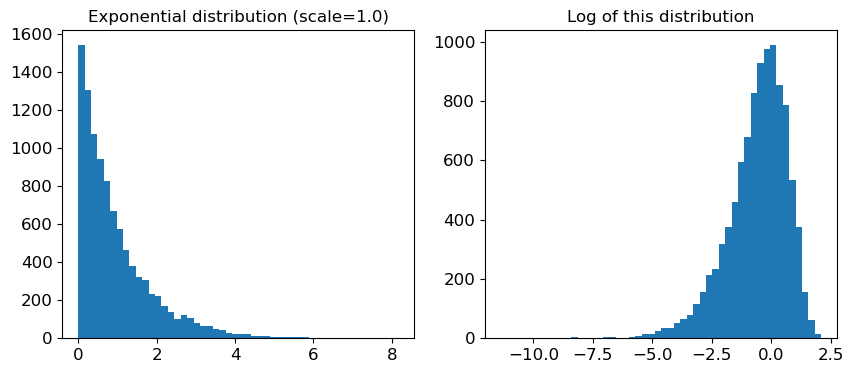

In [72]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

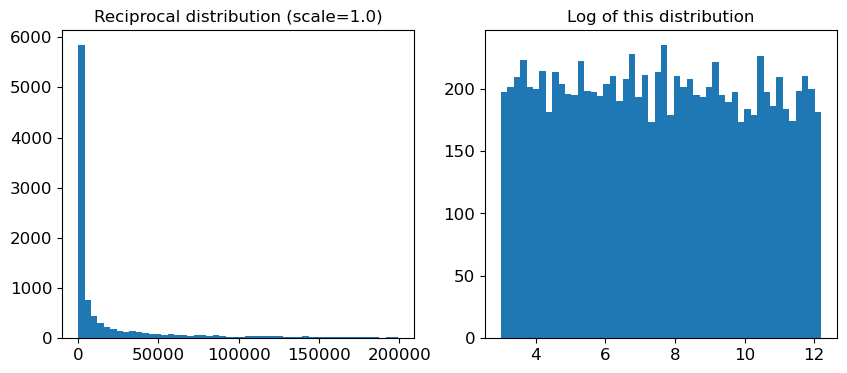

In [73]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

3

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [75]:
k = 5

In [76]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 2,  8,  9, 13, 15], dtype=int64)

In [77]:
np.array(attributes)[top_k_feature_indices]

array(['sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15'],
      dtype='<U13')

In [78]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.1937601350066505, 'grade'),
 (0.17865553454816377, 'sqft_living'),
 (0.13959852215357696, 'lat'),
 (0.08861261416727322, 'sqft_above'),
 (0.07215653104500125, 'sqft_living15')]

In [79]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [81]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(houses)

In [82]:
housing_prepared_top_k_features[0:3]

array([[ 1.55985777,  1.14192533,  2.09444695, -0.55821788,  2.28852982],
       [ 0.47876227,  1.14192533,  0.89037991,  1.26005218,  0.50387   ],
       [ 0.32588008, -0.56500973, -0.04611668, -0.04603931, -0.5347435 ]])

In [84]:
houses_prepared[0:3, top_k_feature_indices]

array([[ 1.55985777,  1.14192533,  2.09444695, -0.55821788,  2.28852982],
       [ 0.47876227,  1.14192533,  0.89037991,  1.26005218,  0.50387   ],
       [ 0.32588008, -0.56500973, -0.04611668, -0.04603931, -0.5347435 ]])

4

In [85]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [87]:

prepare_select_and_predict_pipeline.fit(houses, houses_labels)

Pipeline(steps=[('preparation',
                 Pipeline(steps=[('std_scaler', StandardScaler())])),
                ('feature_selection',
                 TopFeatureSelector(feature_importances=array([0.00945331, 0.07188892, 0.17865553, 0.01951394, 0.00530692,
       0.03746108, 0.02815727, 0.00773682, 0.19376014, 0.08861261,
       0.02177455, 0.03733665, 0.00387441, 0.13959852, 0.05866152,
       0.07215653, 0.02605127]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=113564.03940586245, gamma=0.0007790692366582295))])

In [88]:
some_data = houses.iloc[:4]
some_labels = houses_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [738680.88545285 736065.07705992 455523.39751876 423722.21877319]
Labels:		 [659950.0, 518000.0, 413000.0, 478000.0]


5

In [90]:
houses.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
20332,4,2.75,3510,9400,2.0,0,0,3,9,3510,0,2014,0,47.4827,-122.131,3550,9429
10387,4,2.75,2520,14021,2.0,0,0,3,9,2520,0,1999,0,47.7344,-121.957,2330,14007
682,4,3.50,2380,5809,2.0,0,0,4,7,1750,630,1995,0,47.5536,-122.359,1620,5775
5321,4,2.00,1690,8208,1.0,0,0,4,7,1210,480,1958,0,47.6052,-122.126,1620,8496
5512,5,2.25,3410,35536,2.0,0,0,3,10,2530,880,1974,0,47.6500,-122.155,3140,43453


In [94]:

param_grid = [{
 #   'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(houses, houses_labels)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV] END .............................feature_selection__k=1; total time=  13.1s
[CV] END .............................feature_selection__k=1; total time=  13.1s
[CV] END .............................feature_selection__k=1; total time=  13.3s
[CV] END .............................feature_selection__k=1; total time=  13.1s
[CV] END .............................feature_selection__k=1; total time=  13.1s
[CV] END .............................feature_selection__k=2; total time=  13.8s
[CV] END .............................feature_selection__k=2; total time=  13.5s
[CV] END .............................feature_selection__k=2; total time=  13.6s
[CV] END .............................feature_selection__k=2; total time=  13.5s
[CV] END .............................feature_selection__k=2; total time=  13.5s
[CV] END .............................feature_selection__k=3; total time=  14.4s
[CV] END .............................feature_se

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        Pipeline(steps=[('std_scaler',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        TopFeatureSelector(feature_importances=array([0.00945331, 0.07188892, 0.17865553, 0.01951394, 0.00530692,
       0.03746108, 0.02815727, 0.00773682, 0.19376014, 0.08861261,
       0.02177455, 0.03733665, 0.00387441, 0.13959852, 0.05866152,
       0.07215653, 0.02605127]),
                                                           k=5)),
                                       ('svm_reg',
                                        SVR(C=113564.03940586245,
                                            gamma=0.0007790692366582295))]),
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17]}],
             scoring='neg_mean_squared_error', verbose=2)

In [95]:
grid_search_prep.best_params_

{'feature_selection__k': 17}